# YOMA Inc - Project Management for Customer Heterogeneity

## Analysis of Pricing Strategy and Demand for YOMA Inc.

This Jupyter Notebook provides a data-driven analysis of YOMA Inc.’s planned Easter promotion, which involves a temporary reduction in the delivery fee for non-members from €4 to €3. The objective is to assess how this pricing change affects customer demand, segment behavior, and long-term business strategy.

The analysis includes:
- Understanding Customer Heterogeneity: Identifying key customer segments and how they respond to price changes.
- Aggregate Demand Modeling: Using a demand function to evaluate the relationship between delivery pricing and order volume.
- Graphical Representations: Visualizing the impact of the Easter promotion on demand trends using Python (Matplotlib & Seaborn).
- Strategic Insights: Discussing how pricing strategies, membership models, and demand forecasting can enhance YOMA Inc.’s competitiveness.

By integrating theoretical models with real-world pricing strategies, this notebook will provide data-backed recommendations for optimizing YOMA Inc.’s pricing and membership structures.

## 1. Aggregate Demand Function

To evaluate the impact of YOMA Inc.’s Easter promotion, we analyzed the relationship between delivery price and total customer demand using an aggregate demand function. This function models how different factors—such as price, customer income, competitor pricing, and seasonal influences—affect the total number of orders placed through YOMA’s home delivery service.

### Assumptions of the Aggregate Demand Function

The demand model assumes that customer behavior follows standard economic principles, where demand decreases as price increases. Several key factors were included to reflect real-world conditions:
 - Delivery Price (P): The core variable influencing demand, with a focus on how a price drop from €4 to €3 affects order volume.
 - Customer Income (Y): Higher-income customers are assumed to be less sensitive to price changes, whereas lower-income groups respond more to discounts.
 - Price of Substitutes (P_s): Competing grocery delivery services impact YOMA’s demand, as customers compare pricing and service quality.
 - Price of Complementary Goods (P_c): Restaurant meal delivery acts as a complementary service—if dining out becomes more expensive, home grocery delivery may see increased demand.
 - Seasonal Trends (T): Special occasions, such as Easter, typically drive higher demand for groceries, reinforcing the expected effect of the price reduction.
 - Market Size (N): A larger customer base expands overall demand potential, with urban regions contributing significantly.

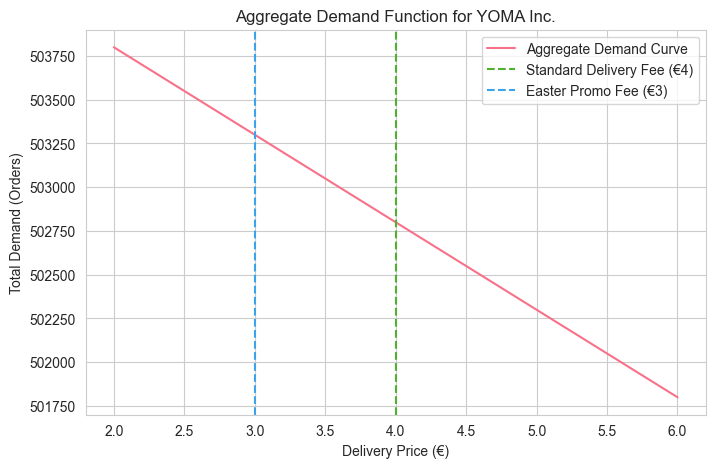

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the aggregate demand function
def aggregate_demand(P, Y, P_s, P_c, T, N, a=5000, b=500, c=0.1, d=200, e=100, f=300, g=0.05):
    return a - b * P + c * Y + d * P_s - e * P_c + f * T + g * N

# Define parameters
Y = 3000  # Average customer income
P_s = 3.5   # Price of substitutes
P_c = 15  # Price of complementary goods
T = 1     # Easter promotion effect
N = 10000000  # Market size

# Generate a range of delivery prices
P_values = np.linspace(2, 6, 100)  # Delivery prices from €2 to €6
Q_values = [aggregate_demand(P, Y, P_s, P_c, T, N) for P in P_values]

# Set seaborn style and color palette
sns.set_style("whitegrid")
husl_colors = sns.color_palette("husl", 3)  # Using three distinct colors

# Generate the demand curve with seaborn using husl colors
plt.figure(figsize=(8, 5))
sns.lineplot(x=P_values, y=Q_values, color=husl_colors[0], label="Aggregate Demand Curve")

# Add vertical lines for standard and promotional prices using husl colors
plt.axvline(x=4, linestyle="--", color=husl_colors[1], label="Standard Delivery Fee (€4)")
plt.axvline(x=3, linestyle="--", color=husl_colors[2], label="Easter Promo Fee (€3)")

# Labels and title
plt.xlabel("Delivery Price (€)")
plt.ylabel("Total Demand (Orders)")
plt.title("Aggregate Demand Function for YOMA Inc.")
plt.legend()
plt.show()

### Results and Interpretation

The demand function was plotted to visualize how order volume reacts to price changes. The pink demand curve clearly shows a negative slope, confirming that as YOMA lowers its delivery fee, demand increases. The standard price of €4 (green dashed line) represents the baseline, while the Easter promotional price of €3 (blue dashed line) illustrates the expected demand surge due to the temporary discount.

The model suggests that price-sensitive segments, such as budget-conscious shoppers and occasional users, are the most likely to respond positively to the promotion, increasing their order frequency. However, premium customers and frequent grocery shoppers may not significantly change their behavior, as they are less influenced by small price adjustments.

From a strategic perspective, the results indicate that YOMA Inc. should not only rely on short-term discounts but also consider long-term pricing strategies—such as membership programs—to sustain customer engagement. A tiered pricing model, offering incentives like free delivery for frequent users or exclusive perks for premium members, could further optimize demand while maintaining profitability.

By leveraging this analysis, YOMA Inc. can make data-driven decisions regarding future pricing strategies, customer segmentation, and long-term demand forecasting.

## 2. Reservation-Price-Model

To assess the impact of YOMA Inc.’s Easter promotion, we applied a reservation price model to analyze customer purchasing behavior at different delivery fees. The model assumes that consumers have varying willingness to pay, represented as a normal distribution of reservation prices across different customer segments. By examining how the probability of purchase changes with price adjustments, YOMA can better predict which customer groups will respond to the discount and how to structure future pricing strategies.

Two interpretations will be provided:
- A cumulative distribution function (CDF) showing the probability that a customer's reservation price is less than or equal to a given price point.
- A probabily of purchase function derived from the 1 - CDF(price), meaning it represents the likelihood that a customer will purchase at a given price point.

### 2.1 Cumulative Distribution Function

The Cumulative Distribution Function (CDF) of reservation prices represents the proportion of customers whose reservation price is below or equal to a given price point. The following key assumptions are made in constructing this model:

Reservation Prices Follow a Normal Distribution:
- In the code, we model each customer segment’s reservation prices using a normal distribution, defined by a mean reservation price (RP_mean) and a standard deviation (RP_std).
- This assumption captures natural variation within each segment—some customers in each group are willing to pay more than average, while others are more price-sensitive.

Different Segments Have Different Price Sensitivities:
- Budget-conscious shoppers (RP_mean = €3.5, RP_std = 0.5) → Most price-sensitive
- Occasional users (RP_mean = €4, RP_std = 0.6) → Moderately price-sensitive
- Frequent grocery shoppers (RP_mean = €5, RP_std = 0.8) → Less price-sensitive
- Premium customers (RP_mean = €5.5, RP_std = 1.0) → Least price-sensitive

These values were chosen to reflect that budget-conscious customers will have lower reservation prices and less variance, whereas premium customers will have higher reservation prices and greater variance in willingness to pay.

The CDF Increases with Price:
- Since the CDF measures the proportion of customers with a reservation price below or equal to the given price, it must be an increasing function.
- As the price increases, more customers are included in the CDF curve, indicating that they are unwilling to pay beyond that point.

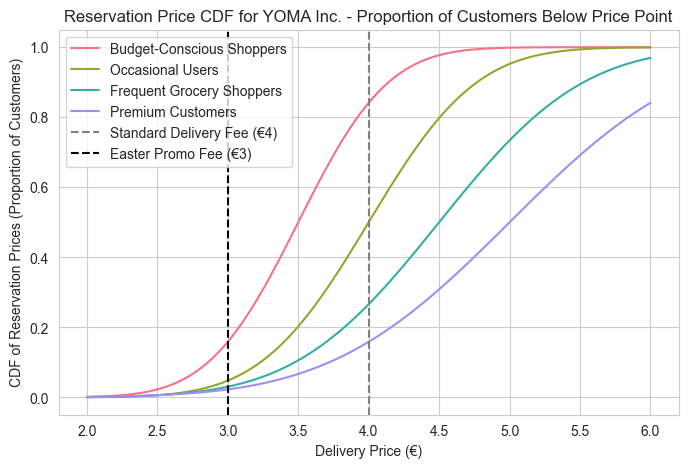

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Define the correct cumulative distribution function (CDF) for reservation prices
def reservation_price_cdf(P, RP_mean, RP_std):
    """
    Calculate the CDF of reservation prices, representing the probability that a customer's
    reservation price is less than or equal to the given price point.
    
    P: Price of delivery service
    RP_mean: Mean reservation price for a customer segment
    RP_std: Standard deviation of reservation price distribution
    """
    return norm.cdf(P, loc=RP_mean, scale=RP_std)

# Define price range
P_values = np.linspace(2, 6, 100)  # Delivery prices from €2 to €6

# Define customer segments with different reservation price assumptions
segments = {
    "Budget-Conscious Shoppers": {"RP_mean": 3.5, "RP_std": 0.5},
    "Occasional Users": {"RP_mean": 4, "RP_std": 0.6},
    "Frequent Grocery Shoppers": {"RP_mean": 4.5, "RP_std": 0.8},
    "Premium Customers": {"RP_mean": 5, "RP_std": 1.0},
}

# Set seaborn style and color palette
sns.set_style("whitegrid")
colors = sns.color_palette("husl", len(segments))

# Create figure for CDF of reservation prices
plt.figure(figsize=(8, 5))

# Plot CDF curves for different customer segments
for i, (segment, params) in enumerate(segments.items()):
    cdf_values = [reservation_price_cdf(P, params["RP_mean"], params["RP_std"]) for P in P_values]
    sns.lineplot(x=P_values, y=cdf_values, label=segment, color=colors[i])

# Add vertical lines for standard and promotional prices
plt.axvline(x=4, linestyle="--", color="gray", label="Standard Delivery Fee (€4)")
plt.axvline(x=3, linestyle="--", color="black", label="Easter Promo Fee (€3)")

# Labels and title for CDF
plt.xlabel("Delivery Price (€)")
plt.ylabel("CDF of Reservation Prices (Proportion of Customers)")
plt.title("Reservation Price CDF for YOMA Inc. - Proportion of Customers Below Price Point")
plt.legend()
plt.show()

### Results and Interpretation

- At €3 (Easter promotional price) → The CDF is lower, meaning fewer customers fall below this price, indicating a larger number of potential buyers.
- At €4 (standard price) → The CDF increases, meaning a greater proportion of customers cannot afford the service, reducing overall demand.
	•
Segment-Specific Behavior:
- Budget-conscious shoppers and occasional users show a steeper CDF slope, meaning a large proportion of them are unwilling to pay higher prices.
- Frequent grocery shoppers and premium customers have flatter curves, meaning their purchasing behavior is less affected by price increases.

Strategic Implications:
- The Easter price reduction from €4 to €3 effectively increases the number of potential buyers in price-sensitive segments.
- However, the higher-value segments remain relatively unaffected, meaning YOMA should consider targeted promotions instead of across-the-board discounts for profitability.

### 2.2 Cumulative Distribution Function

The Probability of Purchase graph is derived from the 1 - CDF(price), meaning it represents the likelihood that a customer will purchase at a given price point. The following key assumptions are embedded in this model:

A Customer Purchases If Their Reservation Price is Greater Than or Equal to the Given Price:
- In the code, we calculate 1 - CDF(price) because a customer will only make a purchase if their reservation price is at least as high as the current price.
- This reflects real-world purchasing behavior, where customers will only proceed with a transaction if they perceive the price as acceptable.

Price Sensitivity Varies by Segment:
- The same four customer segments are used as in the CDF model.
- In the code, lower mean reservation prices correspond to greater price sensitivity, meaning that for budget-conscious shoppers and occasional users, purchase probability drops sharply when the price increases.

The Probability of Purchase Decreases as the Price Increases:
- Since fewer customers will have a reservation price high enough to afford the service at higher price points, the probability of purchase declines as price increases.
- The rate of decline differs by segment, depending on the mean reservation price and standard deviation.

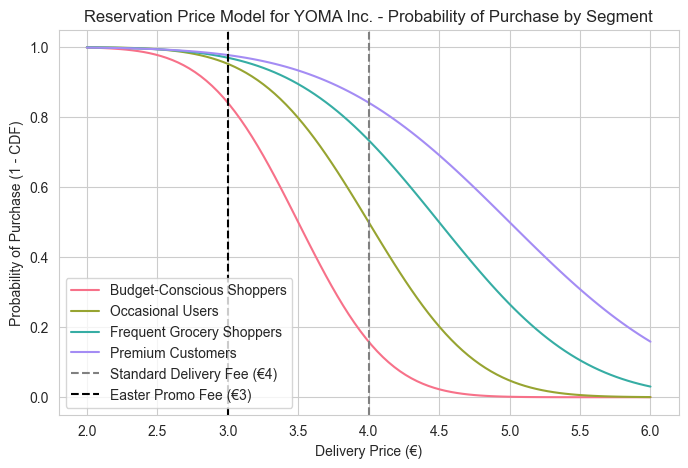

In [18]:
# Create a new figure for the probability of purchase graph
plt.figure(figsize=(8, 5))

# Plot 1 - CDF curves for different customer segments to represent probability of purchase
for i, (segment, params) in enumerate(segments.items()):
    prob_values = [1 - reservation_price_cdf(P, params["RP_mean"], params["RP_std"]) for P in P_values]
    sns.lineplot(x=P_values, y=prob_values, label=segment, color=colors[i])

# Add vertical lines for standard and promotional prices
plt.axvline(x=4, linestyle="--", color="gray", label="Standard Delivery Fee (€4)")
plt.axvline(x=3, linestyle="--", color="black", label="Easter Promo Fee (€3)")

# Labels and title for probability of purchase
plt.xlabel("Delivery Price (€)")
plt.ylabel("Probability of Purchase (1 - CDF)")
plt.title("Reservation Price Model for YOMA Inc. - Probability of Purchase by Segment")
plt.legend()
plt.show()

### Results and Interpretation:

At €3 (Easter promotional price):
- Budget-conscious shoppers and occasional users show a significant increase in purchase probability, confirming that they are highly responsive to price reductions.
- Frequent grocery shoppers and premium customers already exhibit high purchase probabilities, meaning the discount does not significantly impact their behavior.

At €4 (standard price):
- Budget-conscious shoppers and occasional users have a low probability of purchase, meaning many customers in these segments are lost at this price point.
- Higher-value segments maintain strong purchase probabilities, meaning their behavior is not as dependent on pricing changes.

Segment-Specific Insights:
- Budget-conscious shoppers: The probability curve is steep, meaning even small price changes significantly affect their purchasing decision.
- Frequent shoppers and premium customers: The curve is flatter, meaning they are less responsive to price reductions, as they are willing to pay more for convenience and service quality.

Strategic Implications:
- The Easter price reduction is effective for attracting price-sensitive customers, but not necessary for premium segments.
- Instead of universal price cuts, YOMA should explore targeted discounts, memberships, or loyalty programs to retain lower-income customers while maximizing revenue from high-value customers.


Final Takeaways

By combining the CDF of reservation prices with the probability of purchase function (1 - CDF), YOMA Inc. can make data-driven pricing decisions.
	•	The CDF shows how many customers are priced out at different price points.
	•	The probability of purchase function shows how many customers will buy at each price.

These insights allow YOMA to fine-tune its pricing strategy, ensuring that promotions effectively target price-sensitive customers while maintaining profitable pricing for high-value customers.

## 3. Random-Utility-Model

To evaluate YOMA Inc.’s Easter promotion, which reduces the delivery fee from €4 to €3, we can apply a Random Utility Model (RUM) to analyze how customers make decisions based on their preferences, price sensitivity, and choice sets.

Applying the Random Utility Model (RUM) to YOMA Inc.’s Promotion

1. Defining the Decision-Making Process

Under the Random Utility Model (RUM), a customer’s decision to use YOMA Inc.’s delivery service at either €4 or €3 depends on the utility they derive from choosing the service versus not using it (outside option). The utility function for each customer can be expressed as:

$U_i = V_i + \epsilon_i$

Where:
- $U_i$ is the total utility a customer derives from using YOMA’s delivery service.
- $V_i$ represents the deterministic utility component (e.g., price, convenience, brand perception).
- $\epsilon_i$ captures the random factors influencing decision-making (e.g., mood, temporary preferences).

A customer will choose the service if:

$U_{\text{YOMA}} > U_{\text{outside option}}$

2. Modeling the Impact of Price Reduction

The deterministic component $V_i$ often includes price (P), so we assume a linear utility function:

$V_i = \alpha - \beta P$

Where:
- $\alpha$ represents a baseline utility for choosing YOMA’s service.
- $\beta$ is the price sensitivity coefficient, showing how strongly customers react to price changes.
- P is the price of the service (€3 or €4 in this case).

Since lower prices increase utility, the probability that a customer chooses YOMA Inc.’s service at a given price follows a logit model:

$P_{\text{choose YOMA}} = \frac{\exp(V_{\text{YOMA}})}{\exp(V_{\text{YOMA}}) + \exp(V_{\text{outside option}})}$

By applying this model, we can estimate how the probability of choosing YOMA changes when the price is reduced from €4 to €3.

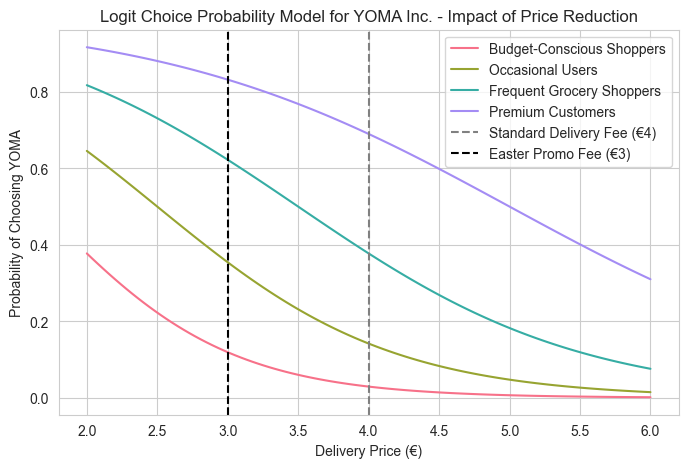

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the logit model for choice probability
def logit_choice_probability(P, alpha, beta):
    """
    Calculate the probability of choosing YOMA's delivery service based on a logit model.
    
    P: Price of delivery service
    alpha: Baseline utility for choosing YOMA
    beta: Price sensitivity coefficient
    """
    V_yoma = alpha - beta * P  # Utility function for YOMA
    V_outside = 0  # Normalize the outside option to 0 for relative comparison
    
    return np.exp(V_yoma) / (np.exp(V_yoma) + np.exp(V_outside))

# Define price range for visualization
P_values = np.linspace(2, 6, 100)  # Delivery prices from €2 to €6

# Define assumed parameters for different customer segments
customer_segments = {
    "Budget-Conscious Shoppers": {"alpha": 2.5, "beta": 1.5},
    "Occasional Users": {"alpha": 3, "beta": 1.2},
    "Frequent Grocery Shoppers": {"alpha": 3.5, "beta": 1.0},
    "Premium Customers": {"alpha": 4, "beta": 0.8},
}

# Set seaborn style and color palette
sns.set_style("whitegrid")
colors = sns.color_palette("husl", len(customer_segments))

# Create figure for logit choice probability curve
plt.figure(figsize=(8, 5))

# Plot choice probability curves for different customer segments
for i, (segment, params) in enumerate(customer_segments.items()):
    choice_prob_values = [logit_choice_probability(P, params["alpha"], params["beta"]) for P in P_values]
    sns.lineplot(x=P_values, y=choice_prob_values, label=segment, color=colors[i])

# Add vertical lines for standard and promotional prices
plt.axvline(x=4, linestyle="--", color="gray", label="Standard Delivery Fee (€4)")
plt.axvline(x=3, linestyle="--", color="black", label="Easter Promo Fee (€3)")

# Labels and title for logit model graph
plt.xlabel("Delivery Price (€)")
plt.ylabel("Probability of Choosing YOMA")
plt.title("Logit Choice Probability Model for YOMA Inc. - Impact of Price Reduction")
plt.legend()
plt.show()

### Results and Interpretation
1.	As price decreases, the probability of choosing YOMA’s delivery service increases.
- The logit model captures how consumers become more likely to opt for YOMA when the price is reduced from €4 to €3.

2.	Price-sensitive segments (budget-conscious and occasional users) see the biggest change.
- Budget-conscious shoppers and occasional users experience a steep increase in probability when the price drops, confirming their high price sensitivity.
- Frequent grocery shoppers and premium customers have a flatter probability curve, meaning they are less affected by small price changes.

3. The Easter promotion (€3) significantly increases purchase probability.
- The black dashed line at €3 shows the new promotional price, where all customer segments see a rise in probability.
- The gray dashed line at €4 (standard price) shows a lower probability of purchase, especially for price-sensitive customers.

4.	Strategic Takeaways for YOMA Inc.:
- The promotion effectively attracts price-sensitive customers but may not be necessary for higher-value segments.
- Instead of uniform discounts, YOMA could consider targeted promotions or membership programs for price-sensitive groups.

## Random-Utility Model for Membership Products

To analyze how different customer segments might choose between YOMA Inc.’s proposed service models, we apply a Multinomial Logit Model based on Random Utility Theory. The goal is to understand how segment-specific preferences influence choice probabilities among:

- Pay-Per-Use (€4/order)
- Standard Membership (€6/month) with moderate perks
- Premium Membership (€10/month) with full benefits

Each customer’s utility for an option is modeled as:

$U_{ij} = -\beta_{\text{price},i} \cdot \text{Price}j + \beta{\text{perks},i} \cdot \text{Perks}j + \beta{\text{priority},i} \cdot \text{Priority}_j$

Where:
	•	$U_{ij}$: utility of customer segment i for option j
	•	$\beta$: segment-specific sensitivity weights for price, perks, and service priority
	•	$\text{Price}_j$: cost of the delivery model
	•	$\text{Perks}_j$: benefits such as discounts or bundled services
	•	$\text{Priority}_j$: added service level (e.g., faster delivery or better support)

The probability of choosing each option is then calculated using the softmax (logit) function:

$P_{ij} = \frac{e^{U_{ij}}}{\sum_k e^{U_{ik}}}$

This framework allows us to simulate how each segment (e.g., budget-conscious vs. premium customers) distributes its preferences among the options.

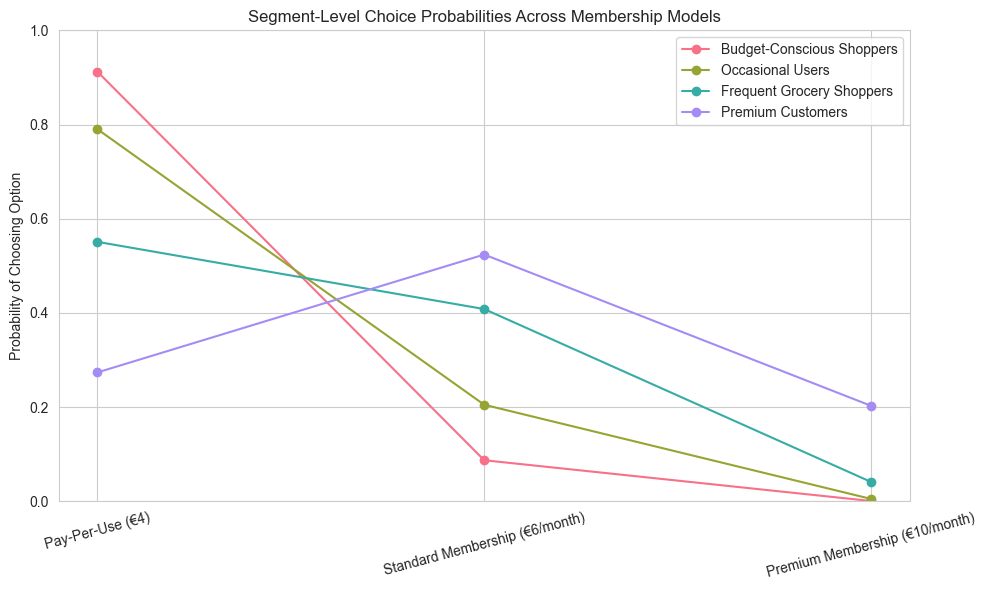

In [2]:
# Assign seaborn style and husl color palette
sns.set_style("whitegrid")
colors = sns.color_palette("husl", len(customer_segments))

# Create figure
plt.figure(figsize=(10, 6))

# Plot probabilities with consistent husl colors
for i, (segment, weights) in enumerate(customer_segments.items()):
    V = (
        -weights["beta_price"] * np.array(prices)
        + weights["beta_perks"] * np.array(perks)
        + weights["beta_priority"] * np.array(priority)
    )
    exp_V = np.exp(V)
    probs = exp_V / np.sum(exp_V)
    plt.plot(option_labels, probs, label=segment, marker="o", color=colors[i])

# Customize plot
plt.ylabel("Probability of Choosing Option")
plt.title("Segment-Level Choice Probabilities Across Membership Models")
plt.ylim(0, 1)
plt.legend()
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Results and Interpretation

The graph generated by the model shows distinct preference patterns across customer segments:
- Budget-Conscious Shoppers overwhelmingly prefer the Pay-Per-Use model, avoiding membership costs.
- Occasional Users also favor Pay-Per-Use, but some show interest in Standard Membership if it brings enough benefits.
- Frequent Grocery Shoppers split their preferences, valuing both Standard and Premium Memberships for their ongoing needs and added convenience.
- Premium Customers strongly favor Standard and Premium Memberships, showing low sensitivity to price and a strong preference for enhanced service.

Implications for YOMA Inc.
- Introduce Pay-Per-Use as a default to attract and retain casual and price-sensitive users.
- Position Standard Membership for regular users seeking value and moderate upgrades.
- Use Premium Membership to target loyal, high-value customers willing to pay for speed and service.

This model provides actionable insights for pricing strategy, customer segmentation, and product design, helping YOMA tailor its offerings more precisely.